# Introducció a xarray: etiqueta les teves dades n-dimensionals

## Què és xarray?

En dues paraules: _pandas multidimensional_

## Estructures de dades de xarray

* **DataArray**: Col·lecció homogènia de dades amb dimensions i coordenades.
* **Dataset**: Col·lecció de DataArrays potencialment relacionats

## Dades exemple pel tutorial

Resultats d'un model Bayesià del campionat de rugby de les sis nacions.

* El model té multiples variables, amb diferents formes
* Les diferents variables poden tenir tipus de dades diferents
* Les dimensions tenen noms i etiquetes. De fet una de les dimensions té multiples variants per etiquetar-la

In [1]:
import numpy as np
import xarray as xr

xr.set_options(display_expand_data=False)

In [2]:
ds = xr.open_dataset("rugby_posterior.nc")

In [3]:
ds

<xarray.Dataset> Size: 2MB
Dimensions:       (draw: 500, match: 60, team: 6, chain: 4, field: 2)
Coordinates:
  * draw          (draw) int32 2kB 0 1 2 3 4 5 6 ... 493 494 495 496 497 498 499
  * match         (match) object 480B 'Wales Italy' ... 'Ireland England'
    home_team     (match) object 480B ...
    away_team     (match) object 480B ...
    year          (match) int32 240B ...
    match_id      (match) int32 240B ...
  * team          (team) object 48B 'Wales' 'France' ... 'Italy' 'England'
  * chain         (chain) int32 16B 0 1 2 3
  * field         (field) object 16B 'home' 'away'
Data variables:
    home_points   (chain, draw, match) int32 480kB ...
    away_points   (chain, draw, match) int32 480kB ...
    atts_team     (chain, draw, team) float64 96kB ...
    defs_team     (chain, draw, team) float64 96kB ...
    atts          (chain, draw, field, team) float64 192kB ...
    defs          (chain, draw, field, team) float64 192kB ...
    intercept     (chain, draw, field) float64 32kB ...
    sd_att        (chain, draw) float64 16kB ...
    sd_def        (chain, draw) float64 16kB ...
    sd_att_field  (chain, draw) float64 16kB ...
    sd_def_field  (chain, draw) float64 16kB ...

## Terminologia en xarray

* Dimensió
* Coordenada
* Variable
* Index

## Per què utilitzar xarray?

xarray no preten substituir les dades tabulars sinó que té com a objectiu oferir un flux de treball similar a aquells usuaris que tenen dades que no encaixen en el format tabular.

In [4]:
ds.nbytes / 1e6

1.636

In [5]:
ds.to_dataframe().info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1440000 entries, (0, 'Wales Italy', 'Wales', 0, 'home') to (499, 'Ireland England', 'England', 3, 'away')
Data columns (total 15 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   home_team     1440000 non-null  object 
 1   away_team     1440000 non-null  object 
 2   year          1440000 non-null  int32  
 3   match_id      1440000 non-null  int32  
 4   home_points   1440000 non-null  int32  
 5   away_points   1440000 non-null  int32  
 6   atts_team     1440000 non-null  float64
 7   defs_team     1440000 non-null  float64
 8   atts          1440000 non-null  float64
 9   defs          1440000 non-null  float64
 10  intercept     1440000 non-null  float64
 11  sd_att        1440000 non-null  float64
 12  sd_def        1440000 non-null  float64
 13  sd_att_field  1440000 non-null  float64
 14  sd_def_field  1440000 non-null  float64
dtypes: float64(9), int32(4), object(2)
memory

## Alineació i _broadcasting_ automàtics

In [6]:
ds["sd_att"] + ds["atts"]

<xarray.DataArray (chain: 4, draw: 500, field: 2, team: 6)> Size: 192kB
4.43 3.147 3.864 4.065 2.481 4.419 3.887 ... 2.885 2.825 2.429 1.553 2.911 1.967
Coordinates:
  * draw     (draw) int32 2kB 0 1 2 3 4 5 6 7 ... 493 494 495 496 497 498 499
  * chain    (chain) int32 16B 0 1 2 3
  * team     (team) object 48B 'Wales' 'France' 'Ireland' ... 'Italy' 'England'
  * field    (field) object 16B 'home' 'away'

In [7]:
ds["home_points"] - ds["defs"]

<xarray.DataArray (chain: 4, draw: 500, match: 60, field: 2, team: 6)> Size: 12MB
49.07 49.08 49.51 49.95 47.34 46.73 48.12 ... 11.44 11.37 11.97 11.24 12.79 13.2
Coordinates:
  * draw       (draw) int32 2kB 0 1 2 3 4 5 6 7 ... 493 494 495 496 497 498 499
  * match      (match) object 480B 'Wales Italy' ... 'Ireland England'
    home_team  (match) object 480B 'Wales' 'France' ... 'France' 'Ireland'
    away_team  (match) object 480B 'Italy' 'England' ... 'Wales' 'England'
    year       (match) int32 240B 2014 2014 2014 2014 ... 2017 2017 2017 2017
    match_id   (match) int32 240B 0 1 2 3 4 5 6 7 8 ... 52 53 54 55 56 57 58 59
  * chain      (chain) int32 16B 0 1 2 3
  * team       (team) object 48B 'Wales' 'France' ... 'Italy' 'England'
  * field      (field) object 16B 'home' 'away'

## Indicar operacions a partir dels noms de les dimensions

In [8]:
ds.mean(["chain", "draw"])

<xarray.Dataset> Size: 3kB
Dimensions:       (match: 60, team: 6, field: 2)
Coordinates:
  * match         (match) object 480B 'Wales Italy' ... 'Ireland England'
    home_team     (match) object 480B 'Wales' 'France' ... 'France' 'Ireland'
    away_team     (match) object 480B 'Italy' 'England' ... 'Wales' 'England'
    year          (match) int32 240B 2014 2014 2014 2014 ... 2017 2017 2017 2017
    match_id      (match) int32 240B 0 1 2 3 4 5 6 7 ... 52 53 54 55 56 57 58 59
  * team          (team) object 48B 'Wales' 'France' ... 'Italy' 'England'
  * field         (field) object 16B 'home' 'away'
Data variables:
    home_points   (match) float64 480B 46.0 16.22 28.48 ... 34.57 17.61 19.74
    away_points   (match) float64 480B 11.52 23.02 11.18 ... 15.84 20.88 16.1
    atts_team     (team) float64 48B -0.01684 0.02007 ... 0.01411 -0.0038
    defs_team     (team) float64 48B -0.0009323 0.001029 ... -0.004622 0.02667
    atts          (field, team) float64 96B 0.4508 -0.3261 ... 0.8416 -0.5298
    defs          (field, team) float64 96B -0.4001 -0.0655 ... -0.6494 -0.6364
    intercept     (field) float64 16B 3.142 2.991
    sd_att        float64 8B 1.581
    sd_def        float64 8B 1.577
    sd_att_field  float64 8B 0.1553
    sd_def_field  float64 8B 0.2333

In [9]:
ds.mean(["chain", "draw", "field"])

<xarray.Dataset> Size: 3kB
Dimensions:       (match: 60, team: 6)
Coordinates:
  * match         (match) object 480B 'Wales Italy' ... 'Ireland England'
    home_team     (match) object 480B 'Wales' 'France' ... 'France' 'Ireland'
    away_team     (match) object 480B 'Italy' 'England' ... 'Wales' 'England'
    year          (match) int32 240B 2014 2014 2014 2014 ... 2017 2017 2017 2017
    match_id      (match) int32 240B 0 1 2 3 4 5 6 7 ... 52 53 54 55 56 57 58 59
  * team          (team) object 48B 'Wales' 'France' ... 'Italy' 'England'
Data variables:
    home_points   (match) float64 480B 46.0 16.22 28.48 ... 34.57 17.61 19.74
    away_points   (match) float64 480B 11.52 23.02 11.18 ... 15.84 20.88 16.1
    atts_team     (team) float64 48B -0.01684 0.02007 ... 0.01411 -0.0038
    defs_team     (team) float64 48B -0.0009323 0.001029 ... -0.004622 0.02667
    atts          (team) float64 48B 0.008745 0.01958 ... 0.009817 0.01055
    defs          (team) float64 48B 0.01249 -0.01634 ... 0.00981 -0.003379
    intercept     float64 8B 3.066
    sd_att        float64 8B 1.581
    sd_def        float64 8B 1.577
    sd_att_field  float64 8B 0.1553
    sd_def_field  float64 8B 0.2333

## Indexar amb etiquetes

In [10]:
ds.sel(chain=[0, 2], draw=1, team="Italy")

<xarray.Dataset> Size: 3kB
Dimensions:       (match: 60, chain: 2, field: 2)
Coordinates:
    draw          int32 4B 1
  * match         (match) object 480B 'Wales Italy' ... 'Ireland England'
    home_team     (match) object 480B 'Wales' 'France' ... 'France' 'Ireland'
    away_team     (match) object 480B 'Italy' 'England' ... 'Wales' 'England'
    year          (match) int32 240B 2014 2014 2014 2014 ... 2017 2017 2017 2017
    match_id      (match) int32 240B 0 1 2 3 4 5 6 7 ... 52 53 54 55 56 57 58 59
    team          <U5 20B 'Italy'
  * chain         (chain) int32 8B 0 2
  * field         (field) object 16B 'home' 'away'
Data variables:
    home_points   (chain, match) int32 480B 49 19 35 18 21 28 ... 14 25 35 22 18
    away_points   (chain, match) int32 480B 12 22 11 11 23 13 ... 29 10 17 17 19
    atts_team     (chain) float64 16B 0.07561 0.925
    defs_team     (chain) float64 16B 1.691 0.08986
    atts          (chain, field) float64 32B -1.755 -0.05107 -0.8564 1.828
    defs          (chain, field) float64 32B 1.514 0.918 0.9891 -1.941
    intercept     (chain, field) float64 32B 3.09 3.04 3.167 2.958
    sd_att        (chain) float64 16B 0.3617 0.4493
    sd_def        (chain) float64 16B 1.299 0.9916
    sd_att_field  (chain) float64 16B 0.1247 0.1002
    sd_def_field  (chain) float64 16B 0.5817 0.06347

In [11]:
ds.isel(team=[4, 5])

<xarray.Dataset> Size: 1MB
Dimensions:       (draw: 500, match: 60, team: 2, chain: 4, field: 2)
Coordinates:
  * draw          (draw) int32 2kB 0 1 2 3 4 5 6 ... 493 494 495 496 497 498 499
  * match         (match) object 480B 'Wales Italy' ... 'Ireland England'
    home_team     (match) object 480B 'Wales' 'France' ... 'France' 'Ireland'
    away_team     (match) object 480B 'Italy' 'England' ... 'Wales' 'England'
    year          (match) int32 240B 2014 2014 2014 2014 ... 2017 2017 2017 2017
    match_id      (match) int32 240B 0 1 2 3 4 5 6 7 ... 52 53 54 55 56 57 58 59
  * team          (team) object 16B 'Italy' 'England'
  * chain         (chain) int32 16B 0 1 2 3
  * field         (field) object 16B 'home' 'away'
Data variables:
    home_points   (chain, draw, match) int32 480kB 48 22 23 22 ... 48 33 18 12
    away_points   (chain, draw, match) int32 480kB 12 24 10 19 ... 12 15 28 15
    atts_team     (chain, draw, team) float64 32kB -0.6389 -0.004367 ... 0.8107
    defs_team     (chain, draw, team) float64 32kB -0.5767 -0.3162 ... -0.7544
    atts          (chain, draw, field, team) float64 64kB -1.315 ... 0.09205
    defs          (chain, draw, field, team) float64 64kB 0.6634 1.269 ... -1.2
    intercept     (chain, draw, field) float64 32kB 3.147 2.998 ... 3.225 2.956
    sd_att        (chain, draw) float64 16kB 3.797 0.3617 0.4588 ... 1.203 1.875
    sd_def        (chain, draw) float64 16kB 1.142 1.299 2.114 ... 1.163 2.347
    sd_att_field  (chain, draw) float64 16kB 0.129 0.1247 ... 0.1641 0.2533
    sd_def_field  (chain, draw) float64 16kB 0.1338 0.5817 ... 0.2103 0.1728

## El mètode query extès a multiples dimensions

In [12]:
ds.query(match="year <= 2016", team="team in ('England', 'Ireland')")

<xarray.Dataset> Size: 1MB
Dimensions:       (draw: 500, match: 45, team: 2, chain: 4, field: 2)
Coordinates:
  * draw          (draw) int32 2kB 0 1 2 3 4 5 6 ... 493 494 495 496 497 498 499
  * match         (match) object 360B 'Wales Italy' ... 'France England'
    home_team     (match) object 360B 'Wales' 'France' ... 'Ireland' 'France'
    away_team     (match) object 360B 'Italy' 'England' ... 'Scotland' 'England'
    year          (match) int32 180B 2014 2014 2014 2014 ... 2016 2016 2016 2016
    match_id      (match) int32 180B 0 1 2 3 4 5 6 7 ... 37 38 39 40 41 42 43 44
  * team          (team) object 16B 'Ireland' 'England'
  * chain         (chain) int32 16B 0 1 2 3
  * field         (field) object 16B 'home' 'away'
Data variables:
    home_points   (chain, draw, match) int32 360kB 48 22 23 22 ... 13 48 28 14
    away_points   (chain, draw, match) int32 360kB 12 24 10 19 24 ... 20 10 9 33
    atts_team     (chain, draw, team) float64 32kB 0.7357 -0.004367 ... 0.8107
    defs_team     (chain, draw, team) float64 32kB -1.053 -0.3162 ... -0.7544
    atts          (chain, draw, field, team) float64 64kB 0.06755 ... 0.09205
    defs          (chain, draw, field, team) float64 64kB -1.507 1.269 ... -1.2
    intercept     (chain, draw, field) float64 32kB 3.147 2.998 ... 3.225 2.956
    sd_att        (chain, draw) float64 16kB 3.797 0.3617 0.4588 ... 1.203 1.875
    sd_def        (chain, draw) float64 16kB 1.142 1.299 2.114 ... 1.163 2.347
    sd_att_field  (chain, draw) float64 16kB 0.129 0.1247 ... 0.1641 0.2533
    sd_def_field  (chain, draw) float64 16kB 0.1338 0.5817 ... 0.2103 0.1728

## Creació d'indexs explícits

In [13]:
ds.sel(year=2016)

KeyError: "no index found for coordinate 'year'"

In [14]:
ds.set_xindex("year").sel(year=2016)

<xarray.Dataset> Size: 915kB
Dimensions:       (draw: 500, match: 15, team: 6, chain: 4, field: 2)
Coordinates:
  * draw          (draw) int32 2kB 0 1 2 3 4 5 6 ... 493 494 495 496 497 498 499
  * match         (match) object 120B 'France Italy' ... 'France England'
    home_team     (match) object 120B 'France' 'Scotland' ... 'Ireland' 'France'
    away_team     (match) object 120B 'Italy' 'England' ... 'Scotland' 'England'
  * year          (match) int32 60B 2016 2016 2016 2016 ... 2016 2016 2016 2016
    match_id      (match) int32 60B 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44
  * team          (team) object 48B 'Wales' 'France' ... 'Italy' 'England'
  * chain         (chain) int32 16B 0 1 2 3
  * field         (field) object 16B 'home' 'away'
Data variables:
    home_points   (chain, draw, match) int32 120kB 25 19 17 9 22 ... 13 48 28 14
    away_points   (chain, draw, match) int32 120kB 12 17 17 19 16 ... 20 10 9 33
    atts_team     (chain, draw, team) float64 96kB -0.1502 -0.2281 ... 0.8107
    defs_team     (chain, draw, team) float64 96kB 2.495 -0.6263 ... -0.7544
    atts          (chain, draw, field, team) float64 192kB 0.6336 ... 0.09205
    defs          (chain, draw, field, team) float64 192kB -1.068 ... -1.2
    intercept     (chain, draw, field) float64 32kB 3.147 2.998 ... 3.225 2.956
    sd_att        (chain, draw) float64 16kB 3.797 0.3617 0.4588 ... 1.203 1.875
    sd_def        (chain, draw) float64 16kB 1.142 1.299 2.114 ... 1.163 2.347
    sd_att_field  (chain, draw) float64 16kB 0.129 0.1247 ... 0.1641 0.2533
    sd_def_field  (chain, draw) float64 16kB 0.1338 0.5817 ... 0.2103 0.1728

## Modes exterior i vectoritzat a l'hora d'indexar

![outer vs vectorized indexing](https://oriolabrilpla.cat/en/_images/indexing_modes.png)

In [15]:
da = ds["sd_att"]
da

<xarray.DataArray 'sd_att' (chain: 4, draw: 500)> Size: 16kB
array([[3.796505, 0.361705, 0.4588  , ..., 2.646134, 3.695351, 1.363935],
       [1.898411, 1.514719, 2.153679, ..., 1.179115, 0.80363 , 0.70764 ],
       [3.987741, 0.449316, 0.080764, ..., 2.56824 , 3.003702, 0.844036],
       [3.804819, 0.211212, 3.571658, ..., 3.308986, 1.202581, 1.874515]])
Coordinates:
  * draw     (draw) int32 2kB 0 1 2 3 4 5 6 7 ... 493 494 495 496 497 498 499
  * chain    (chain) int32 16B 0 1 2 3

In [16]:
da.sel(chain=[0, 2, 1], draw=[1, 0, 2])

<xarray.DataArray 'sd_att' (chain: 3, draw: 3)> Size: 72B
array([[0.361705, 3.796505, 0.4588  ],
       [0.449316, 3.987741, 0.080764],
       [1.514719, 1.898411, 2.153679]])
Coordinates:
  * draw     (draw) int32 12B 1 0 2
  * chain    (chain) int32 12B 0 2 1

In [17]:
chains = xr.DataArray([0, 2, 1], dims=["pointwise_sel"])
draws = xr.DataArray([1, 0, 2], dims=["pointwise_sel"])
da.sel(chain=chains, draw=draws)

<xarray.DataArray 'sd_att' (pointwise_sel: 3)> Size: 24B
array([0.361705, 3.987741, 2.153679])
Coordinates:
    draw     (pointwise_sel) int32 12B 1 0 2
    chain    (pointwise_sel) int32 12B 0 2 1
Dimensions without coordinates: pointwise_sel

## Operacions "groupby"

In [18]:
ds[["home_points", "away_points"]].groupby(("year", "home_team"))

<DatasetGroupBy, grouped over 2 grouper(s), 24 groups in total:
    'year': 4 groups with labels 2014, 2015, 2016, 2017
    'home_team': 6 groups with labels 'England', 'France', ..., 'Wales'>

In [19]:
ds[["home_points", "away_points"]].groupby(("year", "home_team")).mean()

<xarray.Dataset> Size: 770kB
Dimensions:      (year: 4, home_team: 6, chain: 4, draw: 500)
Coordinates:
  * year         (year) int32 16B 2014 2015 2016 2017
  * home_team    (home_team) object 48B 'England' 'France' ... 'Wales'
  * draw         (draw) int32 2kB 0 1 2 3 4 5 6 ... 493 494 495 496 497 498 499
  * chain        (chain) int32 16B 0 1 2 3
Data variables:
    home_points  (chain, draw, year, home_team) float64 384kB 24.5 ... 17.5
    away_points  (chain, draw, year, home_team) float64 384kB 13.5 ... 29.0

In [20]:
gby = ds[["home_points", "away_points"]].groupby(("year", "home_team"))
gby.mean(["chain", "draw", "match"])

<xarray.Dataset> Size: 448B
Dimensions:      (year: 4, home_team: 6)
Coordinates:
  * year         (year) int32 16B 2014 2015 2016 2017
  * home_team    (home_team) object 48B 'England' 'France' ... 'Wales'
Data variables:
    home_points  (year, home_team) float64 192B 21.82 21.76 ... 21.58 19.27
    away_points  (year, home_team) float64 192B 17.42 18.51 ... 22.02 19.54

## Utilitzar funcions tipus `ufunc` arbitràries

In [21]:
from scipy.stats import rankdata

In [22]:
rankdata(ds["sd_att"], axis=0)

array([[2., 2., 2., ..., 3., 4., 3.],
       [1., 4., 3., ..., 1., 1., 1.],
       [4., 3., 1., ..., 2., 3., 2.],
       [3., 1., 4., ..., 4., 2., 4.]])

In [23]:
xr.apply_ufunc(
    rankdata,
    ds["sd_att"],
    input_core_dims=[["chain"]],
    output_core_dims=[["chain"]],
    kwargs={"axis": -1},
)

<xarray.DataArray 'sd_att' (draw: 500, chain: 4)> Size: 16kB
2.0 1.0 4.0 3.0 2.0 4.0 3.0 1.0 2.0 3.0 ... 4.0 4.0 1.0 3.0 2.0 3.0 1.0 2.0 4.0
Coordinates:
  * draw     (draw) int32 2kB 0 1 2 3 4 5 6 7 ... 493 494 495 496 497 498 499
  * chain    (chain) int32 16B 0 1 2 3

In [24]:
xr.apply_ufunc(
    np.mean,
    ds["sd_att"],
    input_core_dims=[["chain"]],
    output_core_dims=[[]],
    kwargs={"axis": -1},
)

<xarray.DataArray 'sd_att' (draw: 500)> Size: 4kB
3.372 0.6342 1.566 2.083 1.49 1.374 ... 1.19 1.261 1.093 2.426 2.176 1.198
Coordinates:
  * draw     (draw) int32 2kB 0 1 2 3 4 5 6 7 ... 493 494 495 496 497 498 499

## Quina és la probabilitat de cada equip de guanyar el campionat?

Puntuació al torneig de les sis nacions:

* Una victòria representa 4 punts
* Un empat representa 2 punts
* Una derrota per 7 o menys punts representa 1 punt
* Una derrota per més de 7 punts representa 0 punts

In [25]:
home_points = (
    (ds["home_points"] > ds["away_points"]) * 4     # 4 punts per victòria
    + (ds["home_points"] == ds["away_points"]) * 2  # 2 punts per empat
    + ((ds["home_points"] < ds["away_points"]) & (ds["away_points"] - ds["home_points"] <= 7))  # 1 punt per derrota per menys de 7 punts
)
away_points = (
    (ds["home_points"] < ds["away_points"]) * 4
    + (ds["home_points"] == ds["away_points"]) * 2
    + ((ds["home_points"] > ds["away_points"]) & (ds["home_points"] - ds["away_points"] <= 7))
)

In [26]:
groupby_sum_home = home_points.groupby("home_team").sum()
groupby_sum_away = away_points.groupby("away_team").sum()
groupby_sum_away

<xarray.DataArray (chain: 4, draw: 500, away_team: 6)> Size: 96kB
34 17 22 0 6 27 32 12 31 0 10 21 28 12 ... 8 23 25 17 26 0 6 29 34 17 34 0 9 26
Coordinates:
  * draw       (draw) int32 2kB 0 1 2 3 4 5 6 7 ... 493 494 495 496 497 498 499
  * chain      (chain) int32 16B 0 1 2 3
  * away_team  (away_team) object 48B 'England' 'France' ... 'Scotland' 'Wales'

In [27]:
teamscores = groupby_sum_home + groupby_sum_away

In [28]:
teamscores = groupby_sum_home.rename(home_team="team") + groupby_sum_away.rename(away_team="team")
teamscores

<xarray.DataArray (chain: 4, draw: 500, team: 6)> Size: 96kB
74 40 57 4 26 61 70 42 68 0 28 52 65 43 ... 57 58 42 66 4 19 69 71 35 69 2 19 59
Coordinates:
  * draw     (draw) int32 2kB 0 1 2 3 4 5 6 7 ... 493 494 495 496 497 498 499
  * chain    (chain) int32 16B 0 1 2 3
  * team     (team) object 48B 'England' 'France' ... 'Scotland' 'Wales'

In [29]:
rank = xr.apply_ufunc(
    rankdata,
    -teamscores,
    input_core_dims=[["team"]],
    output_core_dims=[["team"]],
    kwargs={"axis": -1, "method": "min"},
)
rank.sel(team="England")

<xarray.DataArray (chain: 4, draw: 500)> Size: 16kB
1 1 1 1 3 3 2 1 1 1 1 2 3 2 3 2 2 1 2 ... 2 1 1 1 3 1 1 1 2 2 1 2 1 2 3 2 2 3 1
Coordinates:
  * draw     (draw) int32 2kB 0 1 2 3 4 5 6 7 ... 493 494 495 496 497 498 499
  * chain    (chain) int32 16B 0 1 2 3
    team     <U7 28B 'England'

In [30]:
from xarray_einstats.numba import histogram

bin_edges = np.arange(7) + 0.5
data_sim = (
    histogram(rank, dims=("chain", "draw"), bins=bin_edges, density=True)
    .rename({"bin": "rank"})
    .assign_coords(rank=np.arange(6) + 1)
)

In [31]:
import pandas as pd
idx_dim, col_dim = data_sim.dims
sim_table = pd.DataFrame(data_sim, index=data_sim[idx_dim], columns=data_sim[col_dim])

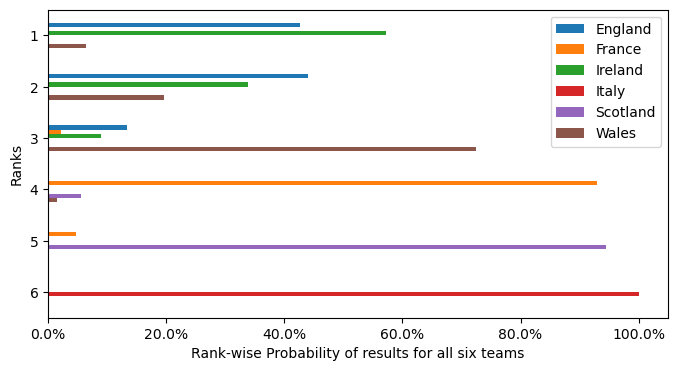

In [32]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

fig, ax = plt.subplots(figsize=(8, 4))
ax = sim_table.T.plot(kind="barh", ax=ax)
ax.xaxis.set_major_formatter(StrMethodFormatter("{x:.1%}"))
ax.set_xlabel("Rank-wise Probability of results for all six teams")
ax.set_yticklabels(np.arange(1, 7))
ax.set_ylabel("Ranks")
ax.invert_yaxis()
ax.legend(loc="best", fontsize="medium");